[-0.15772275000000002, 1.2253301166666664]
[[-0.15772275000000002, 1.2253301166666664]]


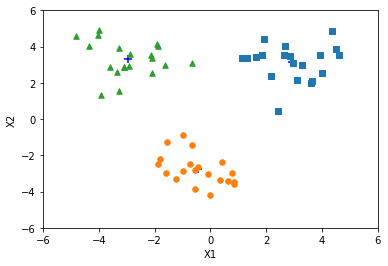

In [73]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
def loadDataSet(fileName):
    dataMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        temp=[]
        curLine = line.strip().split('\t')
        temp.append(float(curLine[0]))
        temp.append(float(curLine[1]))
        dataMat.append(temp)
        #fltLine = map(float,curLine)
        #print(list(fltLine))
        #dataMat.append(list(fltLine))
    return dataMat
def distEclud(vecA,vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet,k):
    n = shape(dataSet)[1]
    #print(n)
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j])-minJ)
        centroids[:,j] = minJ+rangeJ*random.rand(k,1)
    return centroids

def KMeans(dataSet,k,distMeas=distEclud,createCent=randCent):
    dataSet = mat(dataSet)
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet,k)
    #print(centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = Inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0]!=minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex,minDist**2
        for cent in range(k):
            #.A表示把矩阵转换成array，nonzero
            #nonzeros(a)返回数组a中值不为零的元素的下标，返回值是一个数组
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:]=mean(ptsInClust,axis=0)
    return centroids,clusterAssment

def bitKMeans(dataSet,k,distMeas=distEclud,createCent=randCent):
    dataSet = mat(dataSet)
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids0 = mean(dataSet,axis=0).tolist()[0]
    print(centroids0)
    centList = []
    centList.append(centroids0)
    print(centList)
    for j in range(m):
        clusterAssment[j,1]=distMeas(mat(centroids0),dataSet[j,:])**2
    while(len(centList)<k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            centroidMat, splitClustAss = KMeans(ptsInCurrCluster,2,distMeas)
            #下面是计算总误差，所以第二个式子是不等号!=
            seeSplit = sum(splitClustAss[:,1])
            seeNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            if (seeNotSplit + seeSplit) < lowestSSE: 
                bestCentTosplit = i #记录下当前被分开的簇
                bestNewCents = centroidMat #新的质心
                bestClustAss = splitClustAss.copy() #被分开的簇中的样本属于新的簇
                lowestSSE = seeNotSplit + seeSplit
        #将分开的两个簇中的点分别属于新的簇的标号
        bestClustAss[nonzero(bestClustAss[:,0].A==1)[0],0] = len(centList)
        bestClustAss[nonzero(bestClustAss[:,0].A==0)[0],0] = bestCentTosplit
        #更新老的质心
        centList[bestCentTosplit] = bestNewCents[0,:].tolist()
        #添加新的质心
        #print(bestNewCents[1,:])
        centList.append(bestNewCents[1,:].tolist())
        #更新原来clusterAssment中被分开的点属于的簇
        clusterAssment[nonzero(clusterAssment[:,0].A==bestCentTosplit)[0],:]=bestClustAss
    
    centList2 = []
    for i in range(len(centList)):
        tmp = []
        tmp.append(centList[i][0][0])
        tmp.append(centList[i][0][1])
        centList2.append(tmp)
    return mat(centList2),clusterAssment

def draw_pic(centroids, clusterAssment, datMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    k = shape(centroids)[0]
    m = shape(clusterAssment)[0]
    ax.scatter(array(centroids[:,0]), array(centroids[:,1]), marker = '+', color = 'b', label='2', s = 50)
    
    scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    for i in range(m):
        ptsInCurrCluster = datMat[nonzero(clusterAssment[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=30)
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    #plt.savefig("result/filename_" + str(num).zfill(3) + ".png")
    plt.show()

dataMat = loadDataSet('testSet2.txt')
#print(array(dataMat))
centroids,clusterAssment = bitKMeans(dataMat,3)
draw_pic(centroids, clusterAssment, mat(dataMat))
